In [16]:

import matplotlib.pyplot as plt
import numpy as np
import xlrd
from arch.bootstrap import SPA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
from statsmodels.stats.diagnostic import het_arch
from arch import arch_model


In [17]:
# read the data from the csv file /home/vishi/bolinger/22-05cumul_ohlc_diff_percent.csv

df = pd.read_csv('/home/vishi/bolinger/22-05cumul_ohlc_diff_percent.csv', index_col=0, parse_dates=True)
df.head()

,open,high,low,close,close_diff_percent,close_moving_avg,std,upper_bb,lower_bb,close_diff,close_scaled_down
DateTime,,,,,,,,,,,
2024-12-31 09:16:00,2355950,2356430,2354005,2355135,NaN,NaN,NaN,NaN,NaN,NaN,2355.135
2024-12-31 09:17:00,2355070,2356150,2354500,2355915,3.311912,NaN,NaN,NaN,NaN,780.0,2355.915
2024-12-31 09:18:00,2355980,2356025,2355100,2355405,-2.164764,NaN,NaN,NaN,NaN,-510.0,2355.405
2024-12-31 09:19:00,2355400,2357195,2355215,2356905,6.368332,NaN,NaN,NaN,NaN,1500.0,2356.905
2024-12-31 09:20:00,2356960,2357015,2355475,2355475,-6.067279,NaN,NaN,NaN,NaN,-1430.0,2355.475


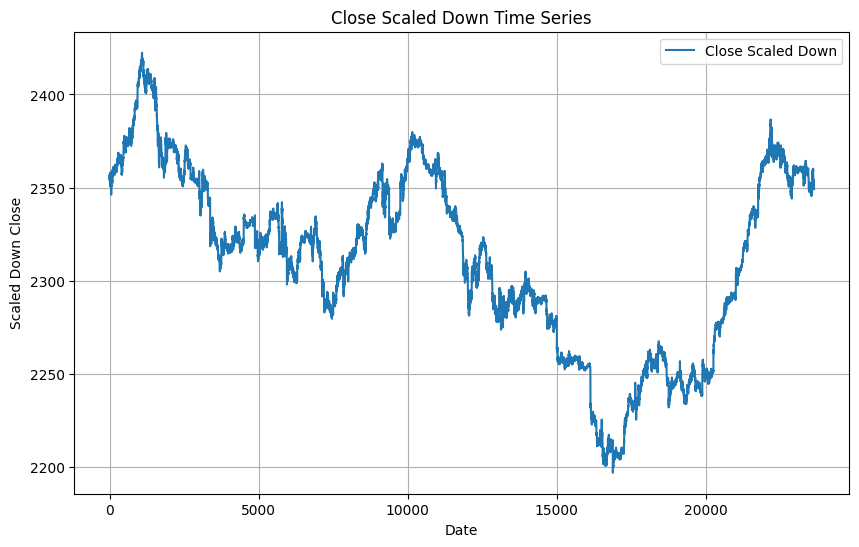

In [18]:
close_scaled_down = df['close_scaled_down']
close_scaled_down = close_scaled_down.dropna()
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(np.array(close_scaled_down), label='Close Scaled Down')
plt.title('Close Scaled Down Time Series')
plt.xlabel('Date')
plt.ylabel('Scaled Down Close')
plt.legend()
plt.grid()
plt.show()


<Figure size 1200x600 with 0 Axes>

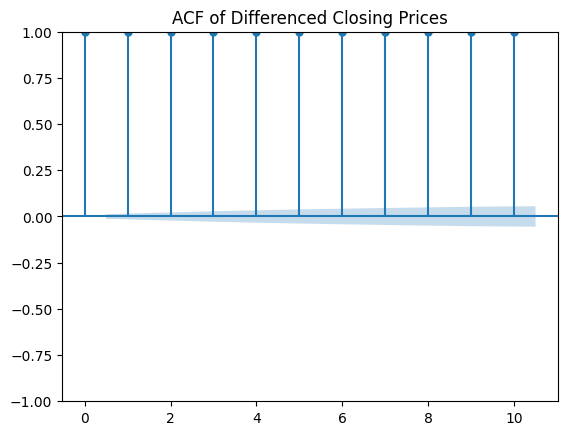

<Figure size 1200x600 with 0 Axes>

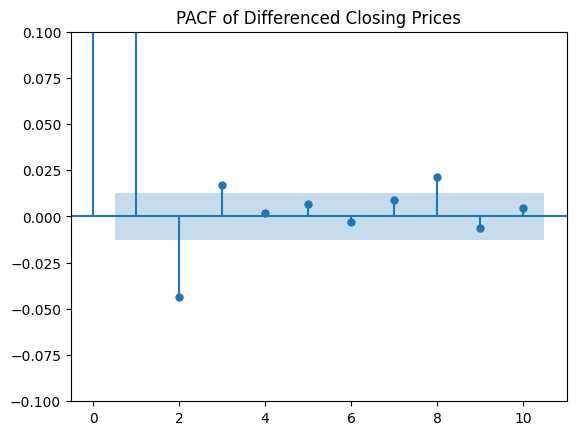

In [19]:
close_scaled_down_np = np.array(close_scaled_down)
plt.figure(figsize=(12, 6))
plot_acf(close_scaled_down_np, lags=10)
# i want yscale to be between 106-3 to -10^-3
# plt.ylim(-0.1, 0.1)
plt.title('ACF of Differenced Closing Prices')
plt.show()
plt.figure(figsize=(12, 6))
plot_pacf(close_scaled_down_np, lags=10)
plt.ylim(-0.1, 0.1)

plt.title('PACF of Differenced Closing Prices')
plt.show()


In [20]:
# fit an arima model to the data
model = ARIMA(close_scaled_down_np, order=(1, 1, 1))
with warnings.catch_warnings():
    warnings.simplefilter("ignore", ConvergenceWarning)
    model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                23625
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -30837.028
Date:                Mon, 26 May 2025   AIC                          61680.056
Time:                        11:54:10   BIC                          61704.266
Sample:                             0   HQIC                         61687.914
                              - 23625                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2462      0.082     -3.014      0.003      -0.406      -0.086
ma.L1          0.2975      0.081      3.656      0.000       0.138       0.457
sigma2         0.7967      0.001    647.016      0.0

In [21]:
model_0_1_2 = ARIMA(close_scaled_down_np, order=(0, 1, 2))
with warnings.catch_warnings():
    warnings.simplefilter("ignore", ConvergenceWarning)
    model_fit_0_1_2 = model_0_1_2.fit()
print(model_fit_0_1_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                23625
Model:                 ARIMA(0, 1, 2)   Log Likelihood              -30836.231
Date:                Mon, 26 May 2025   AIC                          61678.462
Time:                        11:54:12   BIC                          61702.672
Sample:                             0   HQIC                         61686.320
                              - 23625                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0504      0.004     13.135      0.000       0.043       0.058
ma.L2         -0.0174      0.005     -3.791      0.000      -0.026      -0.008
sigma2         0.7967      0.001    647.931      0.0

In [22]:
model_0_1_1 = ARIMA(close_scaled_down_np, order=(0, 1, 1))
with warnings.catch_warnings():
    warnings.simplefilter("ignore", ConvergenceWarning)
    model_fit_0_1_1 = model_0_1_1.fit()
print(model_fit_0_1_1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                23625
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -30839.792
Date:                Mon, 26 May 2025   AIC                          61683.585
Time:                        11:54:14   BIC                          61699.725
Sample:                             0   HQIC                         61688.823
                              - 23625                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0515      0.004     13.481      0.000       0.044       0.059
sigma2         0.7969      0.001    651.082      0.000       0.795       0.799
Ljung-Box (L1) (Q):                   0.02   Jarque-

In [23]:
best_model = ARIMA(close_scaled_down_np, order=(1, 1, 1))
with warnings.catch_warnings():
    warnings.simplefilter("ignore", ConvergenceWarning)
    best_model_fit = best_model.fit()
print(best_model_fit.summary())
residuals = best_model_fit.resid



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                23625
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -30837.028
Date:                Mon, 26 May 2025   AIC                          61680.056
Time:                        11:54:17   BIC                          61704.266
Sample:                             0   HQIC                         61687.914
                              - 23625                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2462      0.082     -3.014      0.003      -0.406      -0.086
ma.L1          0.2975      0.081      3.656      0.000       0.138       0.457
sigma2         0.7967      0.001    647.016      0.0

In [24]:
# fit resuiduals to an GARCH model
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -29833.0
Distribution:                  Normal   AIC:                           59674.1
Method:            Maximum Likelihood   BIC:                           59706.3
                                        No. Observations:                23625
Date:                Mon, May 26 2025   Df Residuals:                    23624
Time:                        11:54:18   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -9.7729e-05  1.269e-02 -7.699e-03      0.

In [25]:
# fit resuiduals to an GARCH model
garch_model = arch_model(residuals, vol='Garch', p=1, q=0)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -29942.1
Distribution:                  Normal   AIC:                           59890.3
Method:            Maximum Likelihood   BIC:                           59914.5
                                        No. Observations:                23625
Date:                Mon, May 26 2025   Df Residuals:                    23624
Time:                        11:54:18   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.4751e-03  1.230e-02      0.201      0.840 

In [26]:
def func_of_arima_1_1_1(t_1_data, t_2_data, ar_param, ma_param, prev_residual):
    """
    Calculate the ARIMA(1,1,1) value based on previous data and parameters.
    
    :param t_1_data: Previous time series data point (t-1)
    :param t_2_data: Previous time series data point (t-2)
    :param ar_param: AR parameter
    :param ma_param: MA parameter
    :param prev_residual: Previous residual
    :return: Computed value for the current time step
    """
    return ar_param * (t_1_data - t_2_data) + ma_param * prev_residual + t_1_data

def func_of_garch_1_1(omega, alpha, beta, prev_volatility, prev_residual):
    """
    Calculate the GARCH(1,1) value based on previous volatility and residuals.
    :param omega: Constant term
    :param alpha: Coefficient for lagged squared residuals
    :param beta: Coefficient for lagged volatility
    :param prev_volatility: Previous volatility
    :param prev_residual: Previous residual
    :return: Computed volatility for the current time step
    """
    return np.sqrt(omega + alpha * prev_residual ** 2 + beta * prev_volatility**2)

def forecast_closing_prices(df,steps=375, k = 2, startdate = "2024-12-31", end_date = "2025-02-01",
                            order_arima=(1, 1, 1), order_garch=(1, 1) ):
    df_filtered = df.loc[startdate:end_date]
    df_prediction = df.loc[df.index > end_date]


    arima_model = ARIMA(df_filtered['close_scaled_down'], order=order_arima)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", ConvergenceWarning)
        arima_fit = arima_model.fit()
    residual_np = np.array(arima_fit.resid)
    

    garch_model = arch_model(residual_np, vol='Garch', p=order_garch[0], q=order_garch[1])
    garch_fit = garch_model.fit(disp="off")

    ma_param = arima_fit.maparams[0]
    ar_param = arima_fit.arparams[0]

    prediction_arima = []
    residual_prediction = []    

    prediction_arima.append(func_of_arima_1_1_1(
        df_filtered['close_scaled_down'].iloc[-1],
        df_filtered['close_scaled_down'].iloc[-2],
        ar_param,
        ma_param,
        residual_np[-1]
    ))

    residual_prediction.append(df_prediction['close_scaled_down'][0] - prediction_arima[-1])

    prediction_arima.append(func_of_arima_1_1_1(
        prediction_arima[-1],
        df_filtered['close_scaled_down'].iloc[-1],
        ar_param,
        ma_param,
        residual_prediction[-1]
    ))
    residual_prediction.append(df_prediction['close_scaled_down'][1] - prediction_arima[-1])
    for i in range(2, steps):
        prediction_arima.append(func_of_arima_1_1_1(
            prediction_arima[-1],
            prediction_arima[-2],
            ar_param,
            ma_param,
            residual_prediction[-1]
        ))
        residual_prediction.append(df_prediction['close_scaled_down'][i] - prediction_arima[-1])

    garch_params = garch_fit.params
    omega = garch_params['omega']
    alpha = garch_params['alpha[1]']
    beta = garch_params['beta[1]']

    vol_garch = garch_fit.conditional_volatility
    volatility_prediction = []

    volatility_prediction.append(func_of_garch_1_1(
        omega,
        alpha,
        beta,
        vol_garch[-1],
        residual_np[-1]
    ))

    for i in range(1, steps):
        volatility_prediction.append(func_of_garch_1_1(
            omega,
            alpha,
            beta,
            volatility_prediction[-1],
            residual_prediction[i-1]
        ))

    return arima_fit, garch_fit, prediction_arima, residual_prediction, volatility_prediction

    

/home/vishi/bolinger/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/vishi/bolinger/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/vishi/bolinger/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipykernel_3615/1301423939.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Data

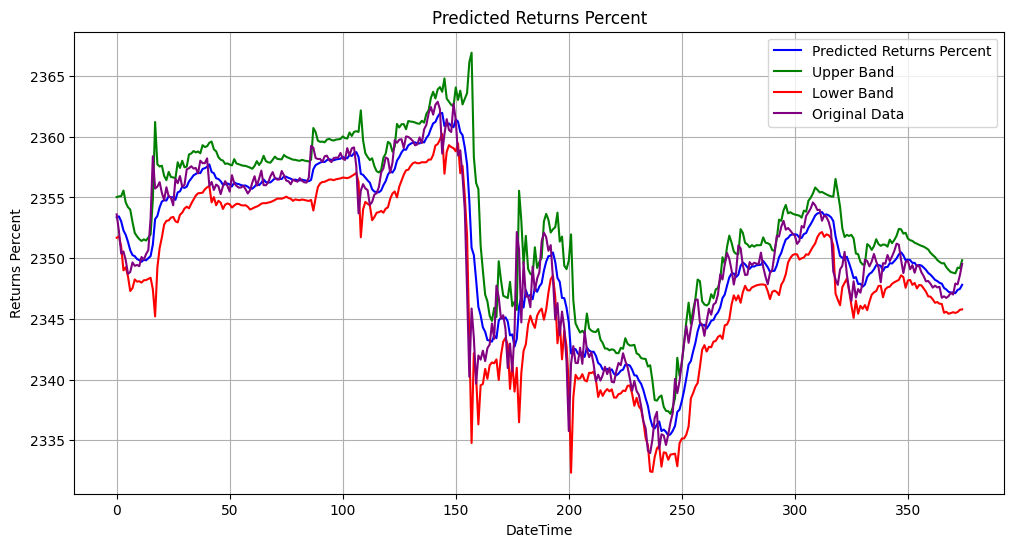

In [27]:
arima_fit_forecast, garch_fit_forecast, prediction_arima, residual_prediction, volatility_prediction = forecast_closing_prices(
    df, steps=375, startdate="2024-12-31", end_date="2025-02-01 09:00",
    order_arima=(1, 1, 1), order_garch=(1, 1)
)
upper_band = np.array(prediction_arima) + 2 * np.array(volatility_prediction)
lower_band = np.array(prediction_arima) - 2 * np.array(volatility_prediction)
mid_band = np.array(prediction_arima)


plt.figure(figsize=(12, 6))
plt.plot(mid_band, label='Predicted Returns Percent', color='blue')
plt.plot(upper_band, label='Upper Band', color='green')
plt.plot(lower_band, label='Lower Band', color='red')
# plt.plot(resid_pred_xyz, label='Residuals of Predicted Returns Percent', color='orange')
plt.plot(np.array(df['close_scaled_down'].loc['2025-02-01 09:00' : '2025-02-02 00:00']), label='Original Data', color='purple')
plt.title('Predicted Returns Percent')
plt.xlabel('DateTime')
plt.ylabel('Returns Percent')
plt.legend()
plt.grid()
plt.show()

In [28]:

def get_avg_std(prices:np.ndarray,period:int)->tuple:
    '''
        Takes a numpy array of prices and gives the moving average 
        and std deviation of the prices \\
        **********
        #### INPUT
        prices - a numpy array of prices \\
        period - a int, the period for which the moving 
                average and std deviation is to be calculated
        **********
        #### OUTPUT
        tuple - a tuple of the moving average and std deviation
        of the prices
                '''
    avg = np.zeros(len(prices))
    std = np.zeros(len(prices))
    for i in range(period, len(prices)+1):
        avg[i-1] = np.mean(prices[i-period:i])
        std[i-1] = np.std(prices[i-period:i])
    return avg, std
    
def construct_upper_lower_bands(prices:np.ndarray, moving_avg:np.ndarray, moving_std:np.ndarray, period:int)->tuple:
    '''
        Takes a numpy array of prices and gives the upper and lower bands \\
        **********
        #### INPUT
        prices - a numpy array of prices \\
        moving_avg - a numpy array of moving averages \\
        moving_std - a numpy array of std deviations \\
        period - a int, the period for which the moving 
                average and std deviation is to be calculated
        **********
        #### OUTPUT
        tuple - a tuple of the upper and lower bands
    '''
    upper_band = np.zeros(len(prices))
    lower_band = np.zeros(len(prices))
    for i in range(period, len(prices)+1):
        upper_band[i-1] = moving_avg[i-1] + 2*moving_std[i-1]
        lower_band[i-1] = moving_avg[i-1] - 2*moving_std[i-1]
    return upper_band, lower_band


def buy_and_sell_profits_basic(closing_prices:np.ndarray, upper_band:np.ndarray, lower_band:np.ndarray, mid_band:np.ndarray):
    '''
        Takes a numpy array of closing prices and gives the profits made by buying and selling \\
            **********
            #### INPUT
            # closing_prices - a numpy array of closing prices \\
            # upper_band - a numpy array of upper bands \\
            # lower_band - a numpy array of lower bands \\
            # mid_band - a numpy array of mid bands \\
            # **********
            # #### OUTPUT
            # tuple - a tuple of the profits made by buying and selling
    '''
    # flag = 0 => no position
    # flag = 1 => long position
    # flag = -1 => short position
    # current_price = the price at which the position was taken
    flag = 0
    current_price = 0
    list_of_profit = []
    profit = 0

    for i in range(len(closing_prices)):
        if flag == 0:
            if closing_prices[i] > upper_band[i]:
                flag = -1
                current_price = closing_prices[i]
            elif closing_prices[i] < lower_band[i]:
                flag = 1
                current_price = closing_prices[i]
        elif flag == -1:
            if closing_prices[i] < mid_band[i]:
                flag = 0
                profit += current_price - closing_prices[i]
        elif flag == 1:
            if closing_prices[i] > mid_band[i]:
                flag = 0
                profit += closing_prices[i] - current_price
        list_of_profit.append(profit)
    if flag == -1:
        profit += current_price - closing_prices[-1]
    elif flag == 1:
        profit += closing_prices[-1] - current_price
    list_of_profit.append(profit)
    return list_of_profit


def generate_list_of_profit(closing_prices:np.ndarray, period:int = 20, k:int = 2):
    '''
        Takes a numpy array of closing prices and gives the profits made by buying and selling \\
            **********
            #### INPUT
            # closing_prices - a numpy array of closing prices \\
            # period - a int, the period for which the moving 
                    average and std deviation is to be calculated
            # k - a int, the number of standard deviations to be used
            **********
            # #### OUTPUT
            # tuple - a tuple of the profits made by buying and selling
    '''
    moving_avg, moving_std = get_avg_std(closing_prices, period=period)
    upper_band, lower_band = construct_upper_lower_bands(closing_prices, moving_avg, moving_std, period=period)
    list_of_profit = buy_and_sell_profits_basic(closing_prices, upper_band, lower_band, moving_avg)
    return list_of_profit


In [29]:

list_of_periods = [5, 10, 15, 20, 25, 30]
list_of_k = [1, 1.5, 2]

closing_prices = np.array(df['close_scaled_down'].loc['2025-02-01 09:00' : '2025-02-02 00:00'])

list_of_profits = []
for k in list_of_k:
    for period in list_of_periods:
        list_of_profits.append(generate_list_of_profit(closing_prices, period, k))
        print(f"Profit for period {period} and k {k} is completed")


Profit for period 5 and k 1 is completed
Profit for period 10 and k 1 is completed
Profit for period 15 and k 1 is completed
Profit for period 20 and k 1 is completed
Profit for period 25 and k 1 is completed
Profit for period 30 and k 1 is completed
Profit for period 5 and k 1.5 is completed
Profit for period 10 and k 1.5 is completed
Profit for period 15 and k 1.5 is completed
Profit for period 20 and k 1.5 is completed
Profit for period 25 and k 1.5 is completed
Profit for period 30 and k 1.5 is completed
Profit for period 5 and k 2 is completed
Profit for period 10 and k 2 is completed
Profit for period 15 and k 2 is completed
Profit for period 20 and k 2 is completed
Profit for period 25 and k 2 is completed
Profit for period 30 and k 2 is completed


In [34]:
benchmark_profit = buy_and_sell_profits_basic(closing_prices, upper_band, lower_band, mid_band)


list_of_returns = []
for i in range(len(list_of_profits)):
    list_of_returns.append(np.diff(list_of_profits[i]))

benchmark_returns = np.diff(benchmark_profit) * 1000
list_of_returns = np.array(list_of_returns).T

benchmark_losses = -benchmark_returns
strategy_losses = -list_of_returns

spa = SPA(benchmark=benchmark_losses,
          models=strategy_losses,
          reps=1000,
          block_size=100,  
          bootstrap="stationary",
          studentize=True,
          nested=False,
          seed=42
          )
spa.compute()
result = spa.better_models(pvalue=0.05, pvalue_type="consistent")
result

array([], dtype=int64)

In [35]:
def reverse_of_buy_and_sell_profits_basic(closing_prices:np.ndarray, upper_band:np.ndarray, lower_band:np.ndarray, mid_band:np.ndarray):
    '''
        Takes a numpy array of closing prices and gives the profits made by buying and selling \\
            **********
            #### INPUT
            # closing_prices - a numpy array of closing prices \\
            # upper_band - a numpy array of upper bands \\
            # lower_band - a numpy array of lower bands \\
            # mid_band - a numpy array of mid bands \\
            # **********
            # #### OUTPUT
            # tuple - a tuple of the profits made by buying and selling
    '''
    # flag = 0 => no position
    # flag = 1 => long position
    # flag = -1 => short position
    # current_price = the price at which the position was taken
    flag = 0
    current_price = 0
    list_of_profit = []
    profit = 0

    for i in range(len(closing_prices)):
        if flag == 0:
            if closing_prices[i] < lower_band[i]:
                flag = -1
                current_price = closing_prices[i]
            elif closing_prices[i] > upper_band[i]:
                flag = 1
                current_price = closing_prices[i]
        elif flag == -1:
            if closing_prices[i] > mid_band[i]:
                flag = 0
                profit += current_price - closing_prices[i]
        elif flag == 1:
            if closing_prices[i] < mid_band[i]:
                flag = 0
                profit += closing_prices[i] - current_price
        list_of_profit.append(profit)
    if flag == -1:
        profit += current_price - closing_prices[-1]
    elif flag == 1:
        profit += closing_prices[-1] - current_price
    list_of_profit.append(profit)
    return list_of_profit



In [36]:
benchmark_profit_2 = reverse_of_buy_and_sell_profits_basic(closing_prices, upper_band, lower_band, mid_band)

benchmark_returns_2 = np.diff(benchmark_profit_2) *1000
benchmark_losses_2 = -benchmark_returns_2

spa_2 = SPA(benchmark=benchmark_losses_2,
            models=strategy_losses,
            reps=1000,
            block_size=100,  
            bootstrap="stationary",
            studentize=True,
            nested=False,
            seed=42
            )
spa_2.compute()
result_2 = spa_2.better_models(pvalue=0.05, pvalue_type="consistent")
print("Results of the SPA test with original buy and sell strategy:")
print(result)
print("Results of the SPA test with reversed buy and sell strategy:")
print(result_2)


Results of the SPA test with original buy and sell strategy:
[]
Results of the SPA test with reversed buy and sell strategy:
[]


In [37]:
benchmark_profit_2[-1]

np.float64(-18.754999999999654)